## Distribution of filter norms

This Notebook plots the distrbution of L2-norms for the first-layer filters in MLP networks. This would illustrate how the *second* kind of redundancy (having extremely small weights) varies with network width.

In [3]:
# Specify experiment settings
import os
import sys
import torch
import torchvision
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import PIL as pil
import sklearn as sk
# local utils
# !find . -name \*.pyc -delete

sys.path.insert(0, "../") # step up to root sourcecode directory

from vis_utils import *
from model_def import *
from model_train import *

%matplotlib inline

In [4]:
# Normalized trace norm of matrices
from numpy import linalg as LA

def calc_filter_norm_multi(expName, dirPath='./data'):
    '''
        Calculate the L2 norms for each filter in 100 networks
    '''
    norm_val = []
    for i in range(0,100):
        # load first-layer weights matrix for i-th network
        w_path = os.path.join(dirPath, expName, expName+'-'+str(i), 'w-mat.npy')
        w = np.load(w_path)
        sz = w.shape
        norm_val.append(LA.norm(w, 2, axis=1))
    
    norm_val = np.asarray(norm_val).flatten()
    return norm_val

In [5]:
# Filter norm over all runs of network training
exp_names = ['cifar-MLP_v6.1', 'cifar-MLP_v6.2', 'cifar-MLP_v6.3']
norm_nets = []
for (i, expName) in enumerate(exp_names):
    norm_nets.append(calc_filter_norm_multi(expName, '../data'))
    

In [6]:
# sanity-check: 100*(fc1_width)
print [x.shape for x in norm_nets]

[(10000,), (50000,), (100000,)]


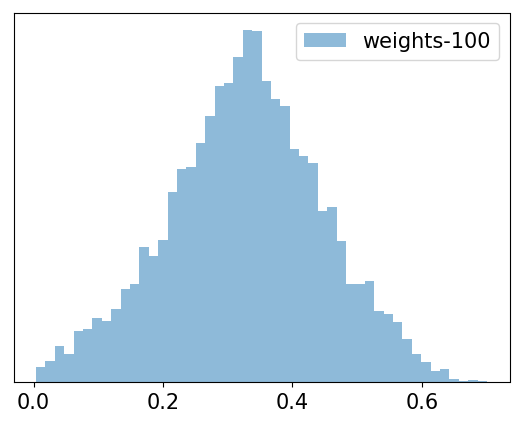

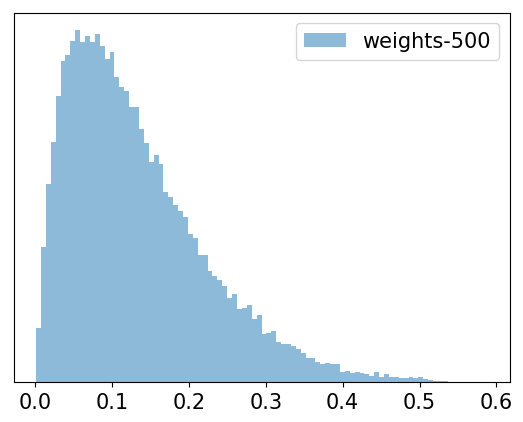

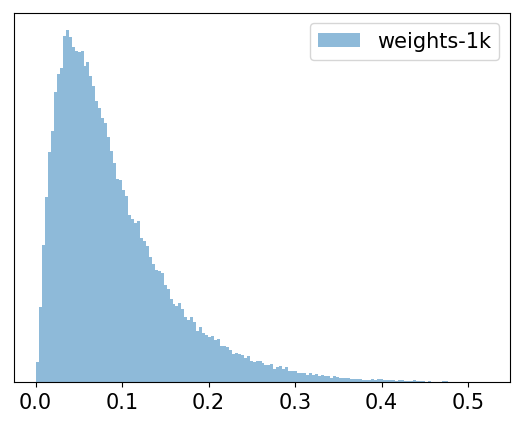

In [12]:
# large fonts
plt.rcParams.update({'font.size': 15})
# plt.style.use('default')

f = plt.figure()
plt.hist(norm_nets[0], bins='auto', alpha=0.5, \
         normed=True, label='weights-100');
plt.legend(loc='upper right')
ax = plt.gca()
ax.yaxis.set_visible(False)
f.savefig(os.path.join('../data', exp_names[0],'norm-hist-100.png'), bbox_inches='tight')

f = plt.figure()
plt.hist(norm_nets[1], bins='auto', alpha=0.5, \
         normed=True, label='weights-500');
plt.legend(loc='upper right')
ax = plt.gca()
ax.yaxis.set_visible(False)
f.savefig(os.path.join('../data', exp_names[1],'norm-hist-500.png'), bbox_inches='tight')

f = plt.figure()
plt.hist(norm_nets[2], bins='auto', alpha=0.5, \
         normed=True, label='weights-1k');
plt.legend(loc='upper right')
ax = plt.gca()
ax.yaxis.set_visible(False)
f.savefig(os.path.join('../data', exp_names[2],'norm-hist-1k.png'), bbox_inches='tight')
